In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os

In [2]:
df = pd.read_csv('data/Cleaned.csv')

In [3]:
bins = pd.IntervalIndex.from_tuples([(0,25),(25,50),(50,np.inf)])
df['AgeBin'] = pd.cut(df.Age,bins)
df.AgeBin.value_counts()

(25.0, 50.0]    1369
(0.0, 25.0]     1351
(50.0, inf]      311
Name: AgeBin, dtype: int64

In [4]:
df = df[~df['Profession'].isin(['Others'])]
df.Profession.value_counts()

Academian/Administration    1630
Medical Professionals       1345
Name: Profession, dtype: int64

In [5]:
countries = df.Country.value_counts().index[:6].tolist()
countries

['China', 'Mexico', 'Bangladesh', 'United States', 'Pakistan', 'Malaysia']

In [6]:
df = df[df['Country'].isin(countries)]
df.Country.value_counts()


China            712
Mexico           573
Bangladesh       484
United States    327
Pakistan         282
Malaysia         144
Name: Country, dtype: int64

In [7]:
df = df[~df['KnowledgeScore'].isin([0])]
df = df[~df['BehaveScore'].isin([0])]

In [8]:
df[['Profession', 'Education', 'Sex','AgeBin', 'Country',]].describe()

,Profession,Education,Sex,AgeBin,Country
count,2520,1752,2520,2520,2520
unique,2,3,2,3,6
top,Academian/Administration,T,Male,"(0.0, 25.0]",China
freq,1395,1434,1476,1254,711


In [9]:
features = ['Profession', 'Education', 'Sex','AgeBin', 'Country',
        ]
ys = ['Access_Of_Information','KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath']

In [10]:
train_df = pd.DataFrame()

In [11]:
access_train_df = pd.DataFrame()
access_df = df
access_df = access_df[~access_df['Access_Of_Information'].isin([0])]
access_df = access_df[~(access_df.Country == 'China')]
for f in features:
    le = preprocessing.LabelEncoder()
    print(f)
    le.fit(access_df[f].astype(str))
    access_train_df[f] = le.transform(access_df[f].astype(str))
access_train_df['Profession'] = access_train_df['Profession'].astype('category')
access_train_df['Education'] = access_train_df['Education'].astype('category')
access_train_df['Sex'] = access_train_df['Sex'].astype('category')
access_train_df['AgeBin'] = access_train_df['AgeBin'].astype('category')
access_train_df['Country'] = access_train_df['Country'].astype('category')

Profession
Education
Sex
AgeBin
Country


In [12]:
for f in features:
    le = preprocessing.LabelEncoder()
    print(f)
    le.fit(df[f].astype(str))
    train_df[f] = le.transform(df[f].astype(str))

Profession
Education
Sex
AgeBin
Country


In [13]:
train_df['Profession'] = train_df['Profession'].astype('category')
train_df['Education'] = train_df['Education'].astype('category')
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['AgeBin'] = train_df['AgeBin'].astype('category')
train_df['Country'] = train_df['Country'].astype('category')
# train_df['Maritial'] = train_df['Maritial'].astype('category')

In [64]:
train_df.Maritial.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Maritial'

<h1> Linear Regressor </h1>

In [34]:
model = LinearRegression()
model.fit(train_x,train_y)
model.coef_

array([ 0.34498239,  0.07661367, -0.02054568, -0.00731623, -0.18633813])

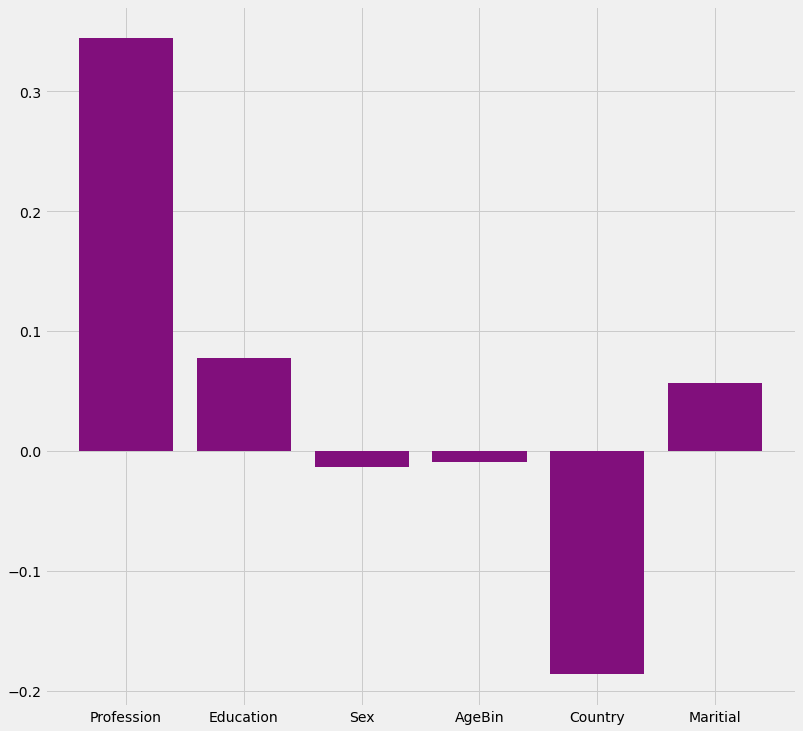

In [19]:
plt.rcParams['figure.figsize'] = (12,12)
plt.style.use('fivethirtyeight')
for i, v in enumerate(model.coef_):
    plt.bar(features,model.coef_)

<h1> XGBRegressor </h1>

In [20]:
!pip install xgboost
from xgboost import XGBRegressor

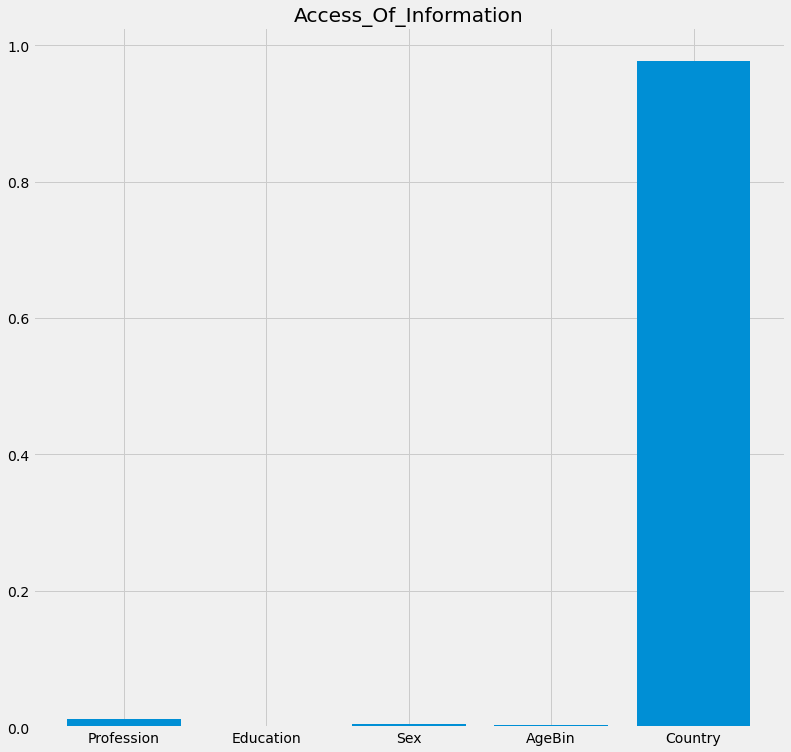

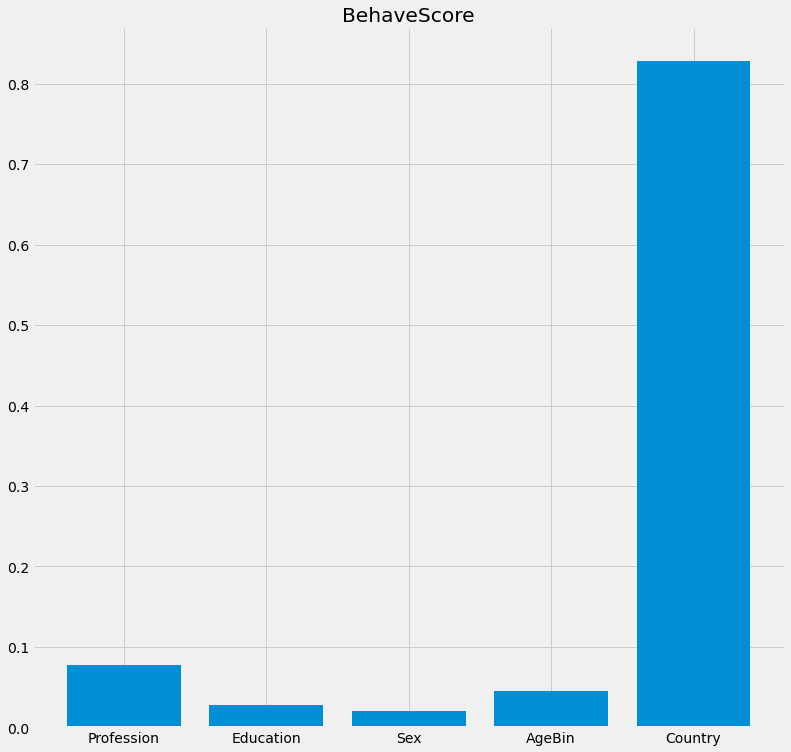

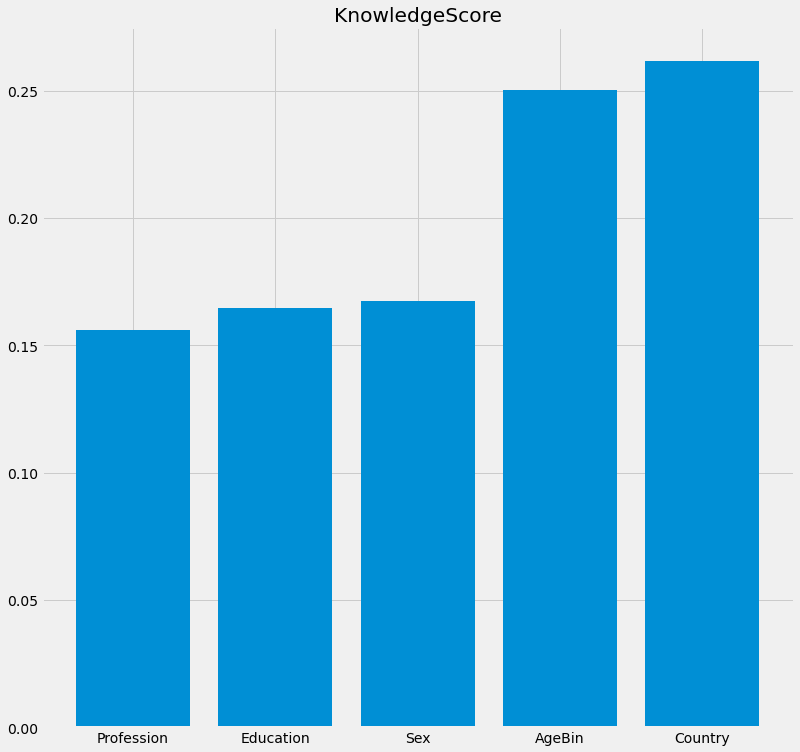

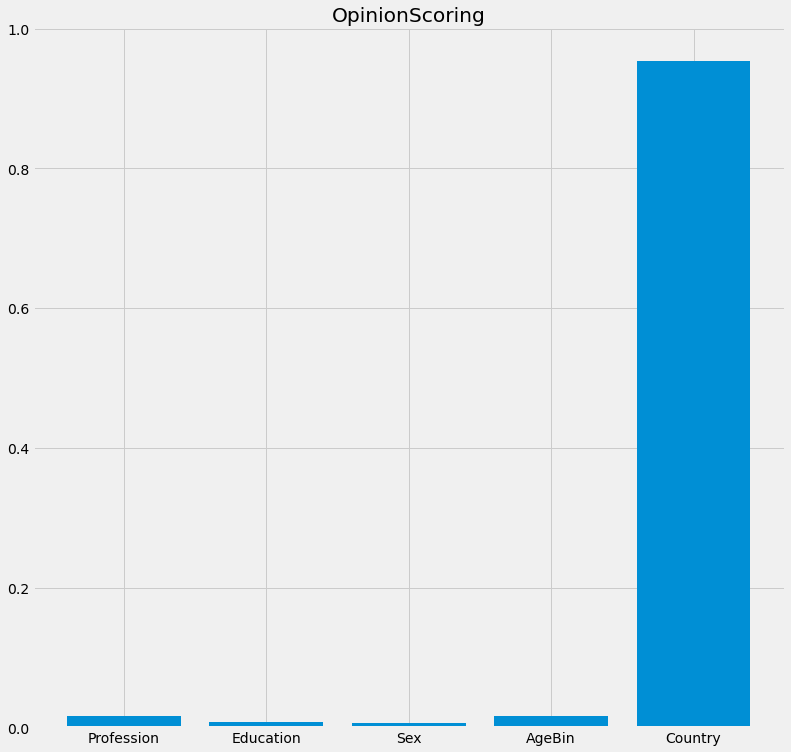

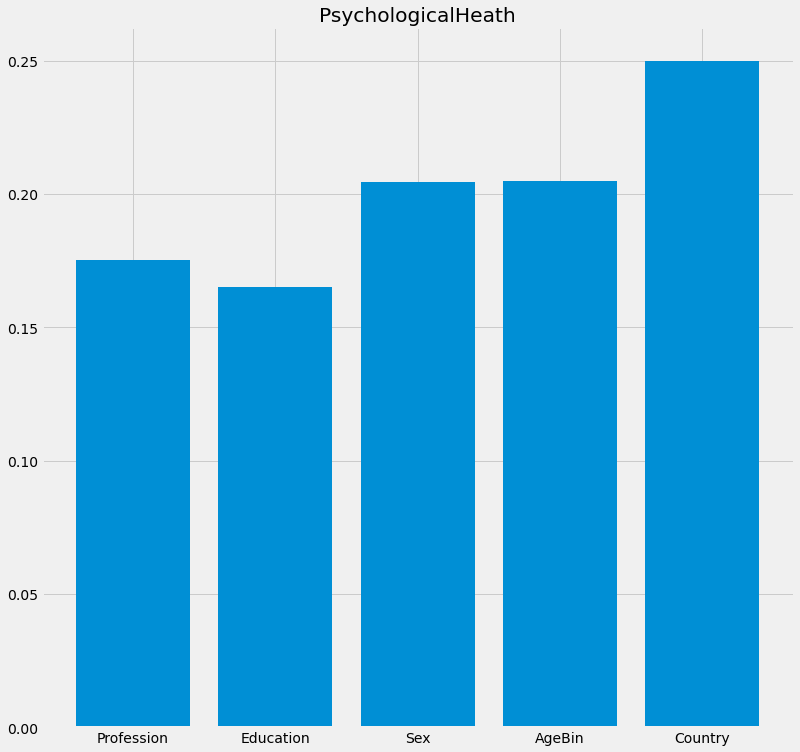

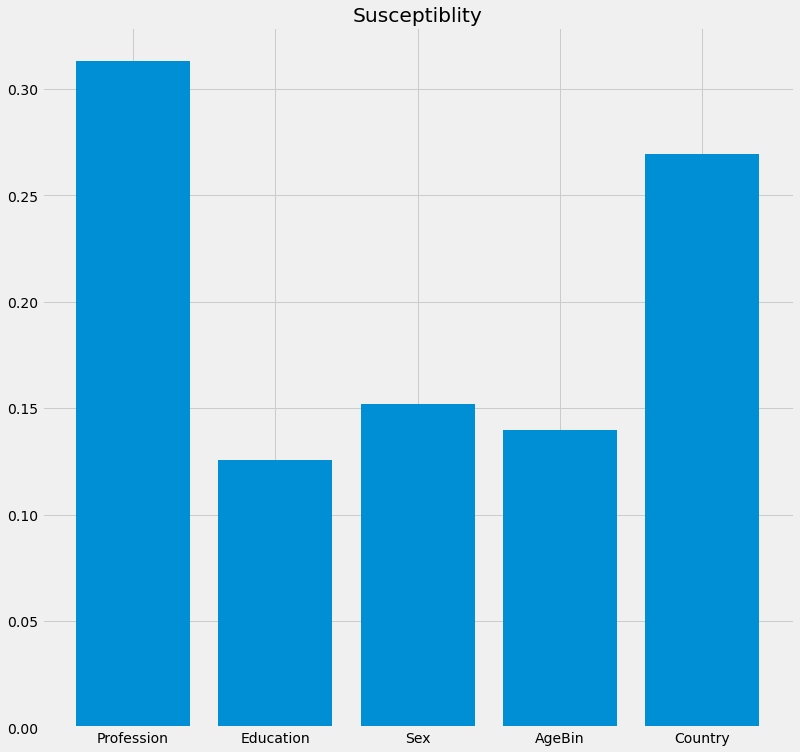

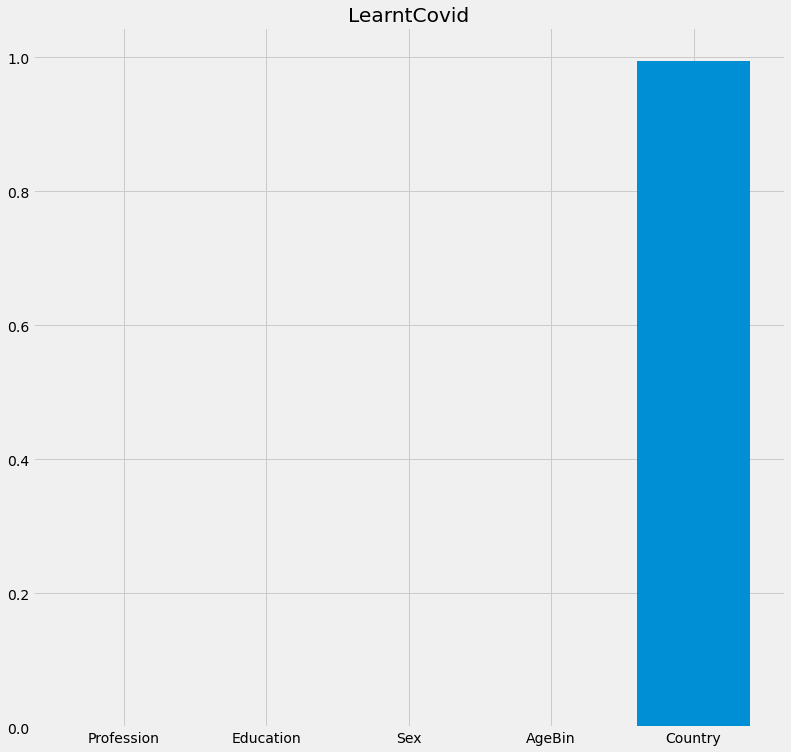

In [38]:
for y in criterion:
    model = XGBRegressor()
    model.fit(train_x,df[y].values)
    importance = model.feature_importances_
    plt.figure()
    plt.bar(features,importance)
    plt.title(y)
    plt.savefig(f'FeatureImportance_{y}',dpi=80)

No handles with labels found to put in legend.


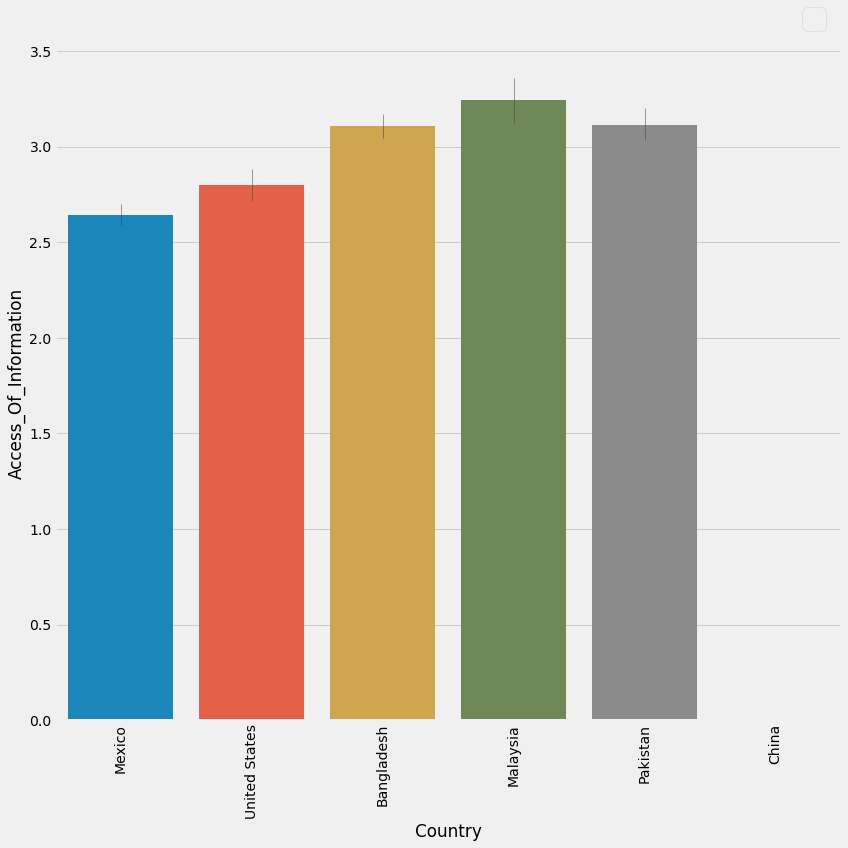

No handles with labels found to put in legend.


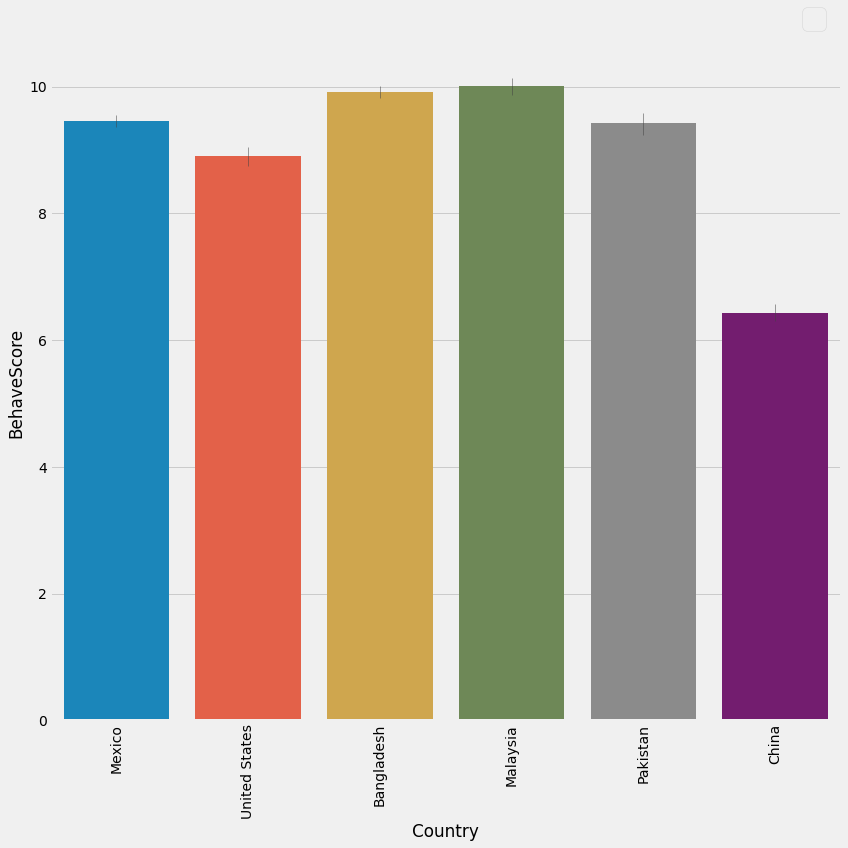

No handles with labels found to put in legend.


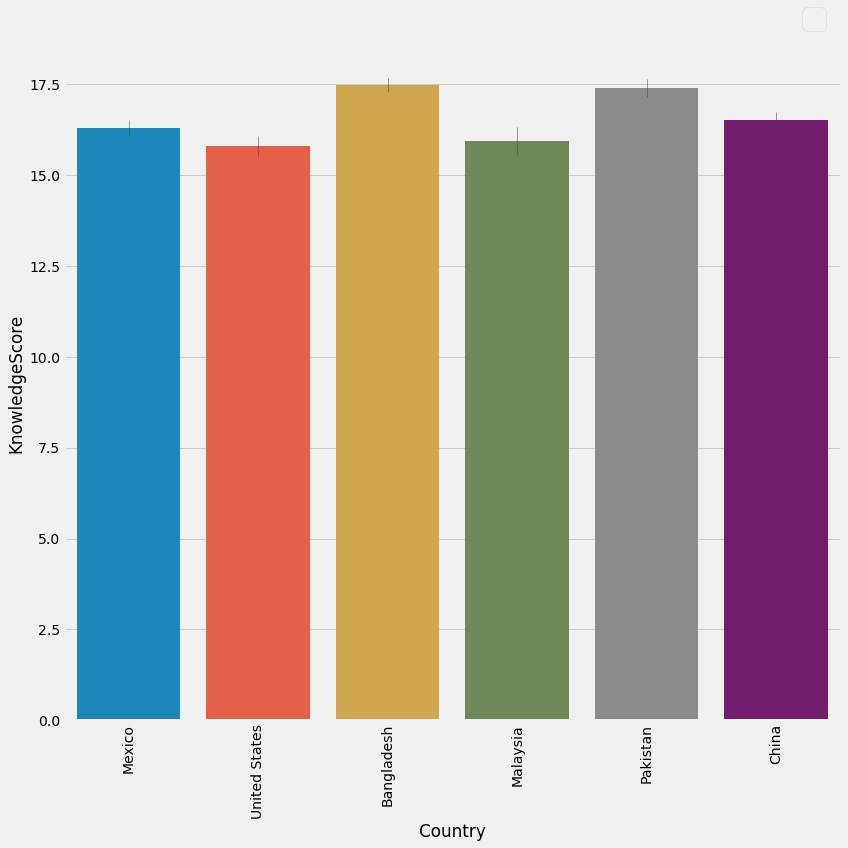

No handles with labels found to put in legend.


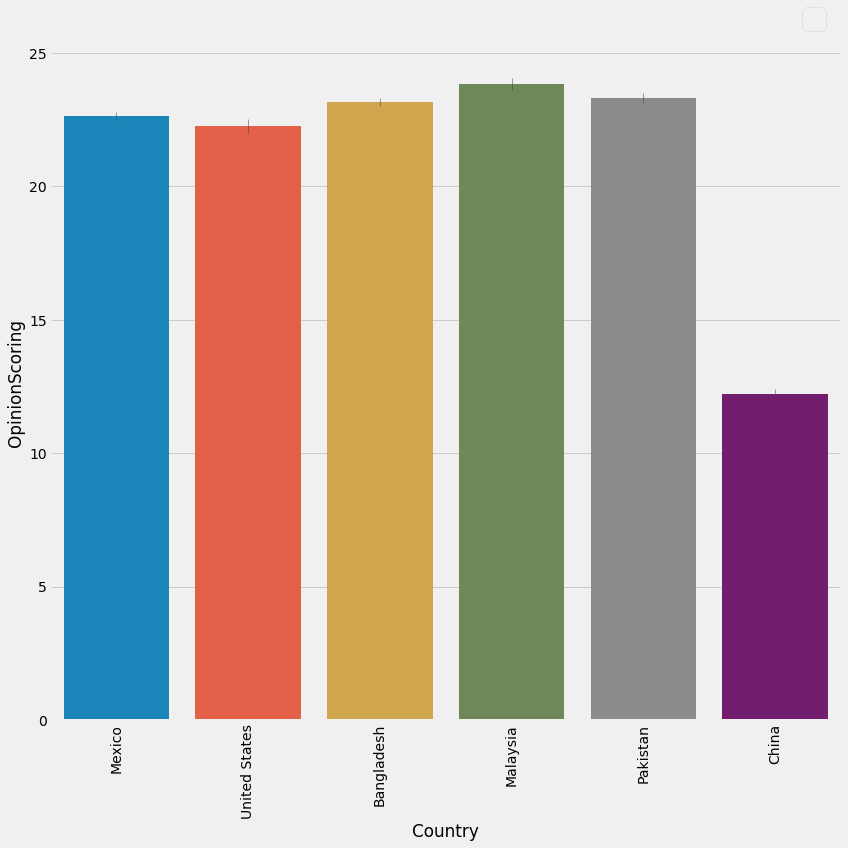

No handles with labels found to put in legend.


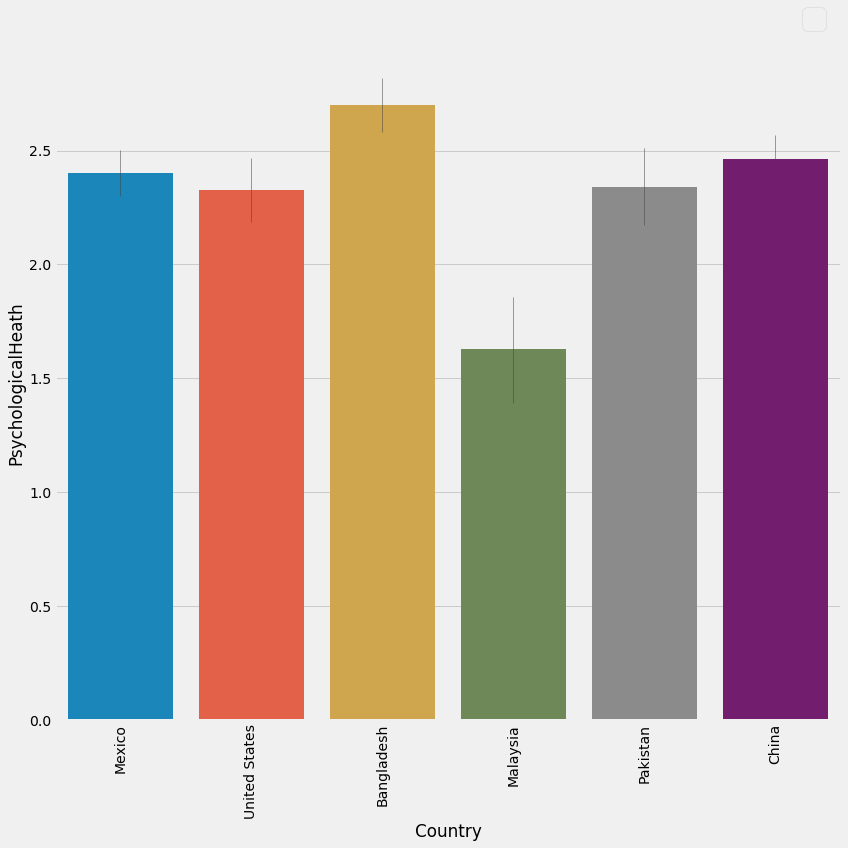

No handles with labels found to put in legend.


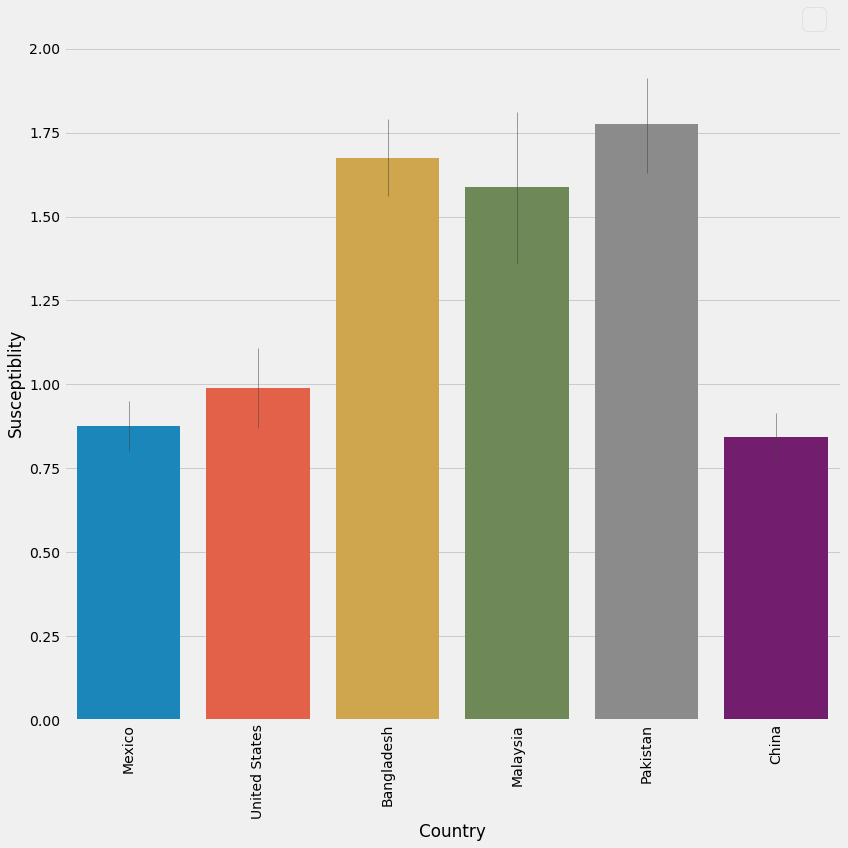

No handles with labels found to put in legend.


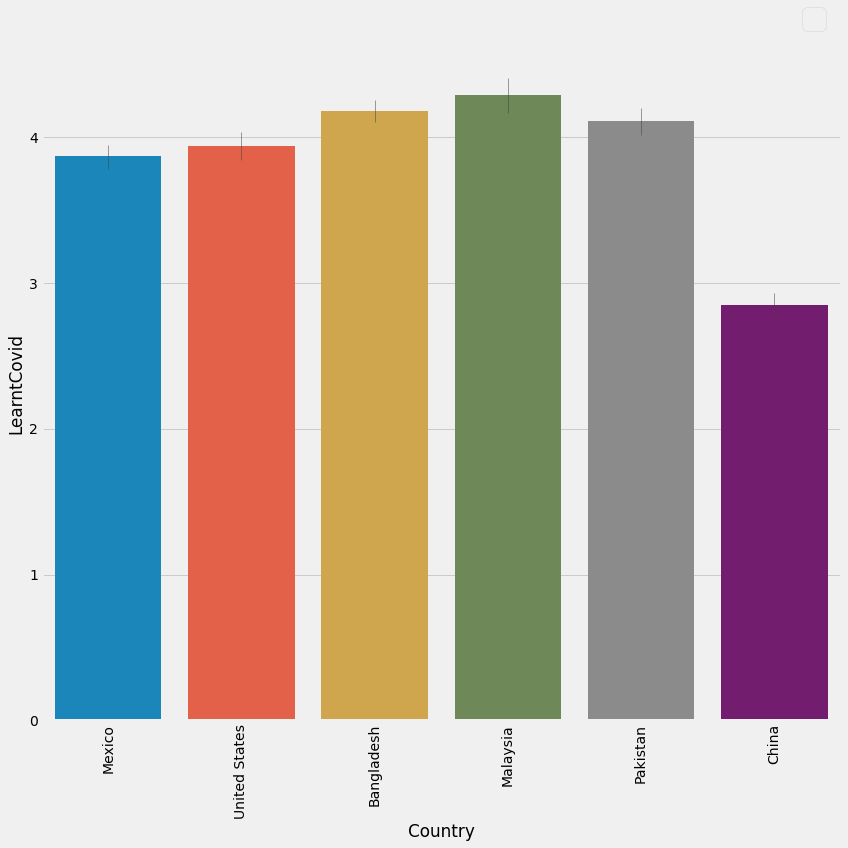

In [37]:
criterion = ['Access_Of_Information', 'BehaveScore', 'KnowledgeScore', 'OpinionScoring',
     'PsychologicalHeath','Susceptiblity', 'LearntCovid']
field = ['Education']
plt.style.use('fivethirtyeight')
cleaned =df[df['Country'].isin(countries)]
for c in criterion:
    ax = sns.barplot(x="Country", y=c, data=df,ci=90,errwidth=0.5)  
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1, 1), loc=4,fontsize=30)
    plt.tight_layout()
#         plt.savefig(os.path.join('Graph',f'{c}_{f}.png'))
    plt.show()

In [39]:
model = XGBRegressor()
model.fit(train_x,df['KnowledgeScore'].values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
!pip install lightgbm
import lightgbm as lgb

In [46]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [152]:
y_pred = gbm.predict(val_x, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(val_y, y_pred) ** 0.5)

The rmse of prediction is: 1.629116927112894


In [15]:
criterion = ['Access_Of_Information','BehaveScore', 'KnowledgeScore', 'OpinionScoring',
     'PsychologicalHealth','Susceptiblity']
cat_y = 'KnowledgeScore'
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y = train_test_split(train_df,df[cat_y].values,test_size=0.2,stratify=df[cat_y].values)

In [16]:
lgb_train = lgb.Dataset(train_x,train_y)
lgb_eval = lgb.Dataset(val_x,val_y)

In [17]:
clf = lgb.LGBMClassifier()
clf.fit(train_x,train_y)

LGBMClassifier()

In [18]:
y_pred = clf.predict(train_x)

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,train_y)
acc

0.26438492063492064

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

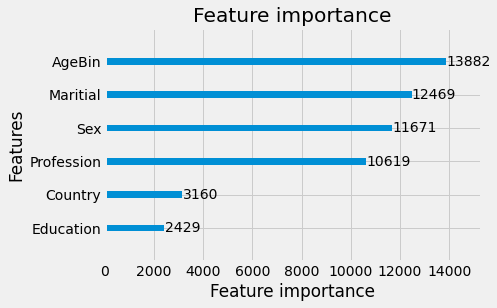

In [35]:
plt.style.use('fivethirtyeight')
lgb.plot_importance(clf)

<AxesSubplot:>

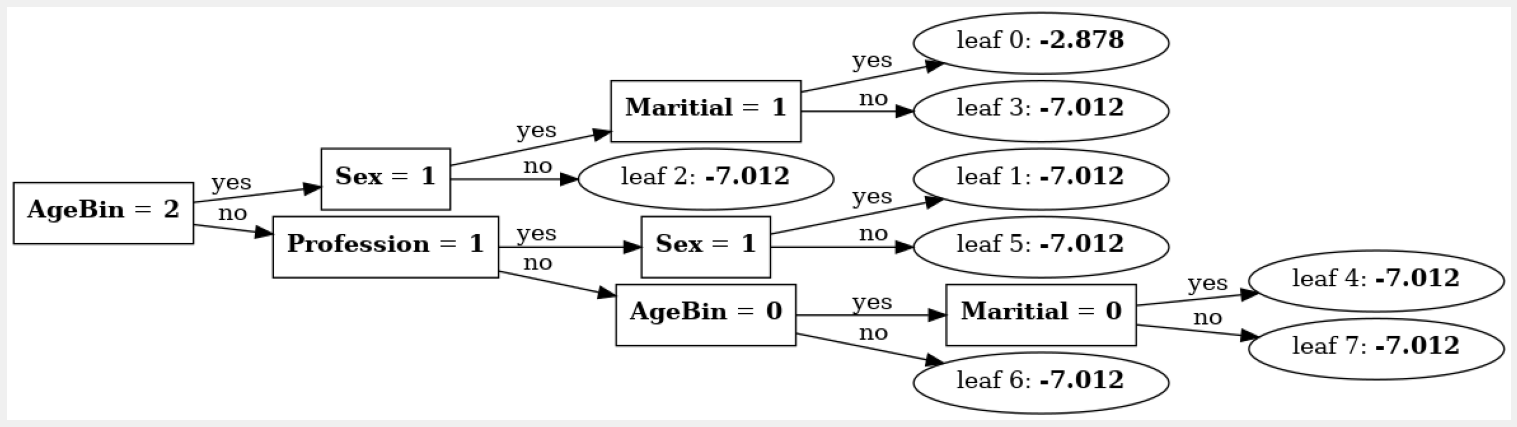

In [36]:
fig,ax = plt.subplots(figsize=(24,24))
lgb.plot_tree(clf,ax=ax)

In [102]:
!pip install graphviz

In [37]:
y_pred

array([17, 16, 17, ..., 16, 17, 16])

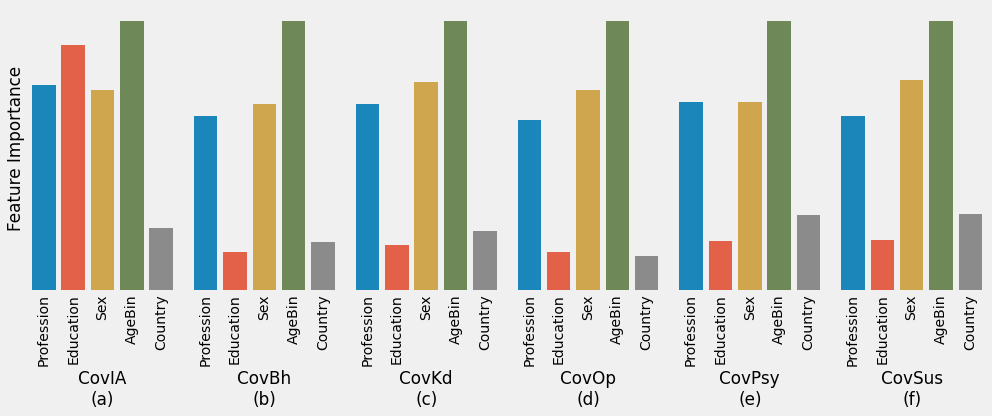

In [20]:
labels = ["CovIA\n(a)","CovBh\n(b)","CovKd\n(c)","CovOp\n(d)","CovPsy\n(e)","CovSus\n(f)"]
plt.style.use('fivethirtyeight')
fig,axs = plt.subplots(1,6,figsize=(14,6))
for i,ax in enumerate(axs.flatten()):
    if i == 0:
        train_x,val_x,train_y,val_y = train_test_split(access_train_df,access_df[criterion[i]].values,
                                                test_size=0.2,stratify=access_df[criterion[i]].values)
    else:
        train_x,val_x,train_y,val_y = train_test_split(train_df,df[criterion[i]].values,
                                                   test_size=0.2,stratify=df[criterion[i]].values)
    clf = lgb.LGBMClassifier()
    clf.fit(train_x,train_y)
    feature_imp = pd.DataFrame(zip(clf.feature_importances_,features), columns=['Importance',criterion[i]])
    sns.barplot(y="Importance", x=criterion[i], data=feature_imp,ax=ax)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Feature Importance")
    ax.grid(False)
    ax.axes.yaxis.set_ticks([])
#     ax.set_title(criterion[i])
    for ax in fig.get_axes():
        ax.label_outer()
        ax.tick_params(axis='x',labelrotation=90)
        plt.tight_layout()
        plt.savefig('FeatureImportance.png',dpi=350)
#     lgb.plot_importance(clf,ax=ax,title=criterion[i])
    
    


In [19]:
df['PsychologicalHealth'] = df['PsychologicalHeath']

In [60]:
train_df

""


In [44]:
df[~(df['Country'] == 'China')]

,Profession,Country,Region,Education,Sex,Age,AgeBin,Maritial,1.1_HeardCovid,1.2_Television/Radio,...,4.1_Lonliness,Access_Of_Information,N90BestToControlSpread,KnowledgeScore,OpinionScoring,Susceptiblity,BehaveScore,PsychologicalHeath,LearntCovid,PsychologicalHealth
4,Academian/Administration,United States,"North America (United States of America, Canada)",NaN,Female,35,"(25.0, 50.0]",2,1,1.0,...,0,1.0,1,16,24,0,5,0,2.0,0
8,Academian/Administration,United States,"North America (United States of America, Canada)",S,Male,25,"(0.0, 25.0]",2,1,1.0,...,1,4.0,1,22,15,1,7,5,5.0,5
9,Academian/Administration,United States,"North America (United States of America, Canada)",S,Male,33,"(25.0, 50.0]",1,1,1.0,...,1,2.0,0,14,24,1,8,5,3.0,5
10,Medical Professionals,Bangladesh,"South Asia (Bangladesh, India, Nepal)",NaN,Male,19,"(0.0, 25.0]",1,1,1.0,...,1,4.0,0,19,19,4,11,5,2.0,5
11,Academian/Administration,Bangladesh,"South Asia (Bangladesh, India, Nepal)",NaN,Female,19,"(0.0, 25.0]",1,1,1.0,...,1,3.0,0,14,24,3,8,2,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,Academian/Administration,Mexico,Central America and Mexico,T,Male,30,"(25.0, 50.0]",1,1,1.0,...,1,2.0,1,20,24,1,9,2,5.0,2
3027,Medical Professionals,Mexico,Central America and Mexico,S,Male,20,"(0.0, 25.0]",1,1,1.0,...,1,2.0,0,16,17,1,8,3,5.0,3
3028,Medical Professionals,Mexico,Central America and Mexico,NaN,Male,24,"(0.0, 25.0]",1,1,1.0,...,1,3.0,0,19,25,0,10,4,4.0,4
3029,Medical Professionals,Mexico,Central America and Mexico,S,Female,20,"(0.0, 25.0]",1,1,1.0,...,0,2.0,0,18,20,4,10,1,5.0,1


In [46]:
train_x,val_x,train_y,val_y = train_test_split(temp_train_df,temp_df[criterion[i]].values,
                                                test_size=0.2,stratify=temp_df[criterion[i]].values)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [48]:
temp_df['Access_Of_Information'].value_counts()

3.0    741
4.0    528
2.0    425
1.0    107
0.0      8
Name: Access_Of_Information, dtype: int64